# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Create a list to store the json response for each city
responses = []

# Create base url
base_url = "http://api.openweathermap.org/data/2.5/weather?q="

city_count = 0
for city in cities:
    url = base_url + f"{city}&units=metric&appid={weather_api_key}"
    city_data = requests.get(url).json()
    if city_data['cod'] == '404':
        print('City not found. Skipping...')
    else:
        responses.append(city_data)
        city_count += 1
        print(f"Processing record {city_count} | {city_data['name']}")

Processing record 1 | Olafsvik
Processing record 2 | Bluff
Processing record 3 | Souillac
Processing record 4 | Vaini
Processing record 5 | Morón
Processing record 6 | Atuona
Processing record 7 | Mataura
Processing record 8 | Fort Nelson
Processing record 9 | Matara
Processing record 10 | Nouadhibou
Processing record 11 | Busselton
Processing record 12 | Kalmar
Processing record 13 | Isangel
Processing record 14 | Hasaki
Processing record 15 | Mossamedes
City not found. Skipping...
Processing record 16 | Dafeng
Processing record 17 | Punta Arenas
Processing record 18 | Kumul
City not found. Skipping...
Processing record 19 | Kapaa
Processing record 20 | Torbay
Processing record 21 | Katsuura
City not found. Skipping...
Processing record 22 | Pangnirtung
Processing record 23 | Mayo
Processing record 24 | Grindavik
Processing record 25 | Ushuaia
Processing record 26 | Hilo
Processing record 27 | Port-Gentil
Processing record 28 | Jamestown
Processing record 29 | Hong Kong
Processing rec

Processing record 232 | Avera
Processing record 233 | Norman Wells
Processing record 234 | Yar-Sale
Processing record 235 | Paamiut
Processing record 236 | Ayr
Processing record 237 | Kalmunai
Processing record 238 | Vardø
Processing record 239 | Banda Aceh
Processing record 240 | Dingle
Processing record 241 | Mahibadhoo
Processing record 242 | Hutchinson
Processing record 243 | Harper
Processing record 244 | Provideniya
Processing record 245 | Rapid Valley
Processing record 246 | Garoowe
Processing record 247 | Pingliang
Processing record 248 | Kysyl-Syr
Processing record 249 | Ouadda
Processing record 250 | Pathein
Processing record 251 | Skibbereen
Processing record 252 | Jertih
Processing record 253 | Yulara
Processing record 254 | Baoro
Processing record 255 | Alofi
Processing record 256 | Korla
Processing record 257 | Careiro da Várzea
Processing record 258 | Hobyo
Processing record 259 | Westport
Processing record 260 | Yerbogachën
City not found. Skipping...
Processing record 

Processing record 455 | Eniwa
Processing record 456 | Kez
Processing record 457 | Novyye Gorki
Processing record 458 | Sumé
Processing record 459 | Pervomayskoye
Processing record 460 | Geraldton
Processing record 461 | Estelí
Processing record 462 | Taltal
Processing record 463 | San Rafael
City not found. Skipping...
Processing record 464 | Sechura
Processing record 465 | Hingoli
Processing record 466 | Severo-Yeniseyskiy
Processing record 467 | Coquimbo
Processing record 468 | Clyde River
Processing record 469 | Mersing
Processing record 470 | Kurchum
Processing record 471 | Mezhdurechensk
Processing record 472 | Haicheng
Processing record 473 | Savannakhet
Processing record 474 | Raja
Processing record 475 | Anzio
Processing record 476 | Nacala
Processing record 477 | Nytva
Processing record 478 | Novoorsk
Processing record 479 | Flin Flon
Processing record 480 | Casper
Processing record 481 | Bathsheba
Processing record 482 | Sai Buri
City not found. Skipping...
Processing record 

## Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create lists to store values
found_cities = []
lats = []
lngs = []
max_temps = []
humidities = []
clouds = []
wind_speeds = []
countries = []
dates = []


for i in range(city_count):
    response = responses[i]
    found_cities.append(response['name'])
    lats.append(response['coord']['lat'])
    lngs.append(response['coord']['lon'])
    max_temps.append(response['main']['temp_max'])
    humidities.append(response['main']['humidity'])
    clouds.append(response['clouds']['all'])
    wind_speeds.append(response['wind']['speed'])
    countries.append(response['sys']['country'])
    dates.append(response['dt'])
    
city_weather_data = pd.DataFrame({'City': found_cities,
                                  'Lat': lats,
                                  'Lng': lngs,
                                  'Max Temp': max_temps,
                                  'Humidity': humidities,
                                  'Cloudiness': clouds,
                                  'Wind Speed': wind_speeds,
                                  'Country': countries,
                                  'Date': dates})
city_weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Olafsvik,64.8945,-23.7142,6.87,86,100,14.05,IS,1633642498
1,Bluff,-46.6000,168.3333,13.22,73,90,1.86,NZ,1633642424
2,Souillac,-20.5167,57.5167,22.21,78,75,3.60,MU,1633642498
3,Vaini,-21.2000,-175.2000,26.09,83,20,4.12,TO,1633642499
4,Morón,-34.6534,-58.6198,16.67,48,1,1.34,AR,1633642250


In [6]:
city_weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,5.430000e+02
mean,21.566677,14.625787,17.088490,71.961326,53.314917,3.461381,1.633643e+09
std,33.336429,88.525216,10.152013,19.658627,39.231246,2.445839,1.155051e+02
min,-54.800000,-175.200000,-18.060000,8.000000,0.000000,0.000000,1.633642e+09
25%,-4.441550,-63.730700,9.550000,64.000000,9.000000,1.790000,1.633643e+09
50%,26.866100,18.423200,19.500000,76.000000,59.000000,2.820000,1.633643e+09
75%,49.233300,81.467600,25.280000,86.000000,92.000000,4.620000,1.633643e+09
max,78.218600,178.004200,36.950000,100.000000,100.000000,15.500000,1.633643e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

Based on the summary table above, there are no cities where humidity > 100%!

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

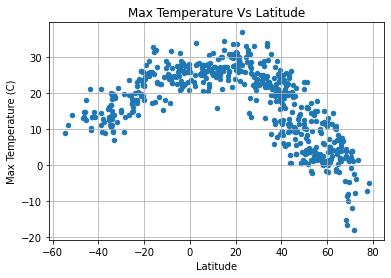

In [7]:
# Set x and y values
city_weather_data.plot('Lat', 'Max Temp', kind='scatter', xlabel='Latitude', ylabel='Max Temperature (C)', title='Max Temperature Vs Latitude', grid=True)
plt.show()

## Latitude vs. Humidity Plot

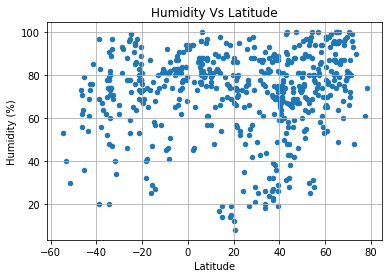

In [8]:
city_weather_data.plot('Lat', 'Humidity', kind='scatter', xlabel='Latitude', ylabel='Humidity (%)', title='Humidity Vs Latitude', grid=True)
plt.show()

## Latitude vs. Cloudiness Plot

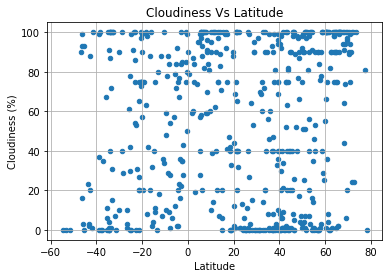

In [9]:
city_weather_data.plot('Lat', 'Cloudiness', kind='scatter', xlabel='Latitude', ylabel='Cloudiness (%)', title='Cloudiness Vs Latitude', grid=True)
plt.show()

## Latitude vs. Wind Speed Plot

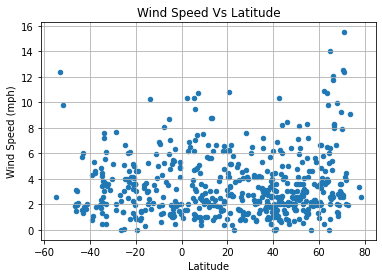

In [10]:
city_weather_data.plot('Lat', 'Wind Speed', kind='scatter', xlabel='Latitude', ylabel='Wind Speed (mph)', title='Wind Speed Vs Latitude', grid=True)
plt.show()

## Linear Regression

In [11]:
# split data into northern and southern hemispheres
northern_hem_cities = city_weather_data.loc[(city_weather_data['Lat'] > 0)]
southern_hem_cities = city_weather_data.loc[(city_weather_data['Lat'] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-value is -0.8337365188632392


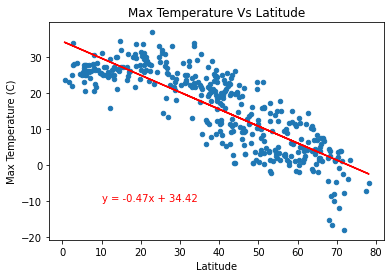

In [18]:
xvalues = northern_hem_cities['Lat']
yvalues = northern_hem_cities['Max Temp']
slope, intercept, r, p, std_err = linregress(xvalues, yvalues)
fit = slope*xvalues + intercept
fit_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

print(f"The R-value is {r}")
northern_hem_cities.plot('Lat', 'Max Temp', kind='scatter', xlabel='Latitude', ylabel='Max Temperature (C)', title='Max Temperature Vs Latitude')
plt.plot(xvalues, fit, "-", color='r')
plt.annotate(fit_eq, (10,-10), color='r')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-value is 0.7732622634775325


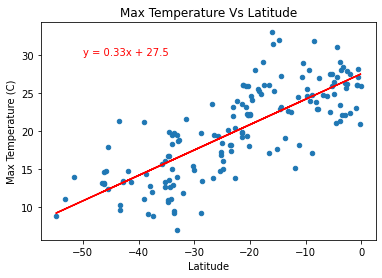

In [19]:
xvalues = southern_hem_cities['Lat']
yvalues = southern_hem_cities['Max Temp']
slope, intercept, r, p, std_err = linregress(xvalues, yvalues)
fit = slope*xvalues + intercept
fit_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

print(f"The R-value is {r}")
southern_hem_cities.plot('Lat', 'Max Temp', kind='scatter', xlabel='Latitude', ylabel='Max Temperature (C)', title='Max Temperature Vs Latitude')
plt.plot(xvalues, fit, "-", color='r')
plt.annotate(fit_eq, (-50,30), color='r')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R-value is 0.1354170848274709


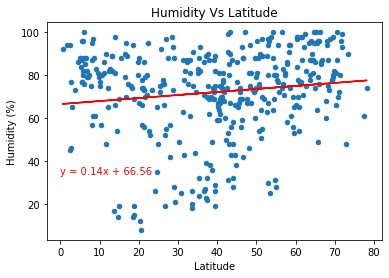

In [20]:
xvalues = northern_hem_cities['Lat']
yvalues = northern_hem_cities['Humidity']
slope, intercept, r, p, std_err = linregress(xvalues, yvalues)
fit = slope*xvalues + intercept
fit_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

print(f"The R-value is {r}")
northern_hem_cities.plot('Lat', 'Humidity', kind='scatter', xlabel='Latitude', ylabel='Humidity (%)', title='Humidity Vs Latitude')
plt.plot(xvalues, fit, "-", color='r')
plt.annotate(fit_eq, (0,34), color='r')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R-value is 0.25080428559500423


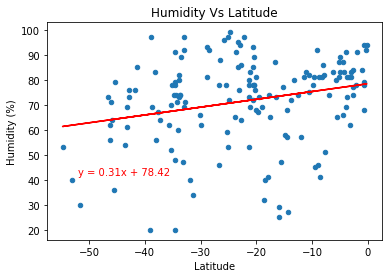

In [24]:
xvalues = southern_hem_cities['Lat']
yvalues = southern_hem_cities['Humidity']
slope, intercept, r, p, std_err = linregress(xvalues, yvalues)
fit = slope*xvalues + intercept
fit_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

print(f"The R-value is {r}")
southern_hem_cities.plot('Lat', 'Humidity', kind='scatter', xlabel='Latitude', ylabel='Humidity (%)', title='Humidity Vs Latitude')
plt.plot(xvalues, fit, "-", color='r')
plt.annotate(fit_eq, (-52,42), color='r')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-value is 0.03515404552922064


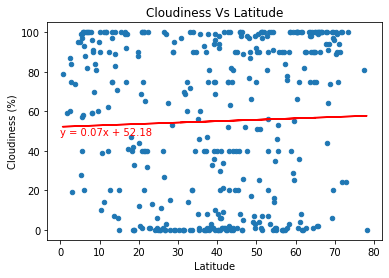

In [35]:
xvalues = northern_hem_cities['Lat']
yvalues = northern_hem_cities['Cloudiness']
slope, intercept, r, p, std_err = linregress(xvalues, yvalues)
fit = slope*xvalues + intercept
fit_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

print(f"The R-value is {r}")
northern_hem_cities.plot('Lat', 'Cloudiness', kind='scatter', xlabel='Latitude', ylabel='Cloudiness (%)', title='Cloudiness Vs Latitude')
plt.plot(xvalues, fit, "-", color='r')
plt.annotate(fit_eq, (0,48), color='r')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-value is 0.13847160892602123


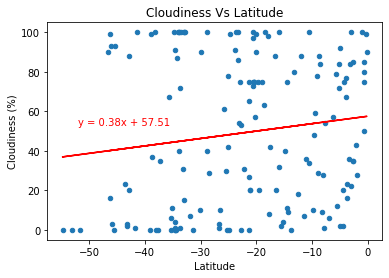

In [34]:
xvalues = southern_hem_cities['Lat']
yvalues = southern_hem_cities['Cloudiness']
slope, intercept, r, p, std_err = linregress(xvalues, yvalues)
fit = slope*xvalues + intercept
fit_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

print(f"The R-value is {r}")
southern_hem_cities.plot('Lat', 'Cloudiness', kind='scatter', xlabel='Latitude', ylabel='Cloudiness (%)', title='Cloudiness Vs Latitude')
plt.plot(xvalues, fit, "-", color='r')
plt.annotate(fit_eq, (-52,53), color='r')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-value is 0.08333973811099514


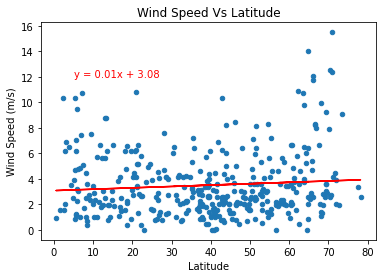

In [36]:
xvalues = northern_hem_cities['Lat']
yvalues = northern_hem_cities['Wind Speed']
slope, intercept, r, p, std_err = linregress(xvalues, yvalues)
fit = slope*xvalues + intercept
fit_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

print(f"The R-value is {r}")
northern_hem_cities.plot('Lat', 'Wind Speed', kind='scatter', xlabel='Latitude', ylabel='Wind Speed (m/s)', title='Wind Speed Vs Latitude')
plt.plot(xvalues, fit, "-", color='r')
plt.annotate(fit_eq, (5,12), color='r')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-value is -0.03438641676670062


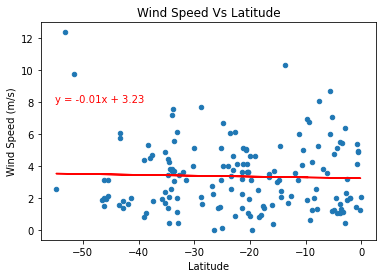

In [39]:
xvalues = southern_hem_cities['Lat']
yvalues = southern_hem_cities['Wind Speed']
slope, intercept, r, p, std_err = linregress(xvalues, yvalues)
fit = slope*xvalues + intercept
fit_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

print(f"The R-value is {r}")
southern_hem_cities.plot('Lat', 'Wind Speed', kind='scatter', xlabel='Latitude', ylabel='Wind Speed (m/s)', title='Wind Speed Vs Latitude')
plt.plot(xvalues, fit, "-", color='r')
plt.annotate(fit_eq, (-55,8), color='r')
plt.show()